# Weather Forecasting: Data analysis

Dataset link: https://drive.google.com/file/d/1IOIhSo_CmC_L-Kcf0-sCq14ieGYbxNGg/view?usp=sharing

In [128]:
!pip install lazypredict

In [129]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score

In [130]:
# Reading weather dataset
df=pd.read_csv('/content/drive/MyDrive/Cancer datstetsts/seattle-weather (1).csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,drizzle
1,2012-01-02,10.90,10.60,2.80,4.50,rain
2,2012-01-03,0.80,11.70,7.20,2.30,rain
3,2012-01-04,20.30,12.20,5.60,4.70,rain
4,2012-01-05,1.30,8.90,2.80,6.10,rain


In [131]:
df.shape

(1461, 6)

In [132]:
# Checking null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [134]:
# Checking duplicates
df.duplicated().sum()

0

In [135]:
# Statistical information
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.00,1461.00,1461.00,1461.00
mean,3.03,16.44,8.23,3.24
std,6.68,7.35,5.02,1.44
min,0.00,-1.60,-7.10,0.40
25%,0.00,10.60,4.40,2.20
50%,0.00,15.60,8.30,3.00
75%,2.80,22.20,12.20,4.00
max,55.90,35.60,18.30,9.50


In [136]:
# Label encoding
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [137]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.00,12.80,5.00,4.70,0
1,2012-01-02,10.90,10.60,2.80,4.50,2
2,2012-01-03,0.80,11.70,7.20,2.30,2
3,2012-01-04,20.30,12.20,5.60,4.70,2
4,2012-01-05,1.30,8.90,2.80,6.10,2


In [138]:
# Preprocessing on date feature
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [139]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,2012-01-01,0.00,12.80,5.00,4.70,0,2012,1,1
1,2012-01-02,10.90,10.60,2.80,4.50,2,2012,1,2
2,2012-01-03,0.80,11.70,7.20,2.30,2,2012,1,3
3,2012-01-04,20.30,12.20,5.60,4.70,2,2012,1,4
4,2012-01-05,1.30,8.90,2.80,6.10,2,2012,1,5


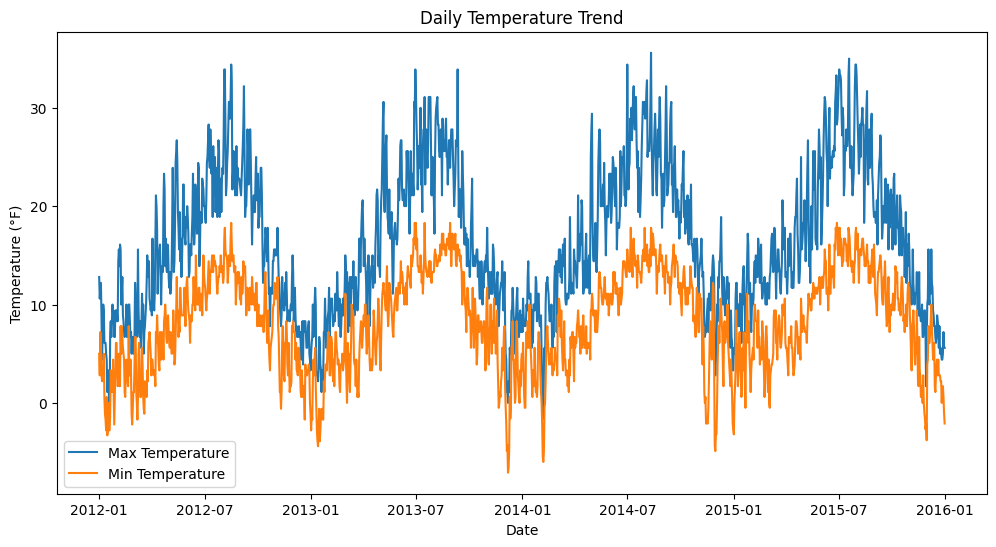

In [140]:
# Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['temp_max'],label='Max Temperature')
sns.lineplot(x=df['date'], y=df['temp_min'],label='Min Temperature')
plt.title('Daily Temperature Trend')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

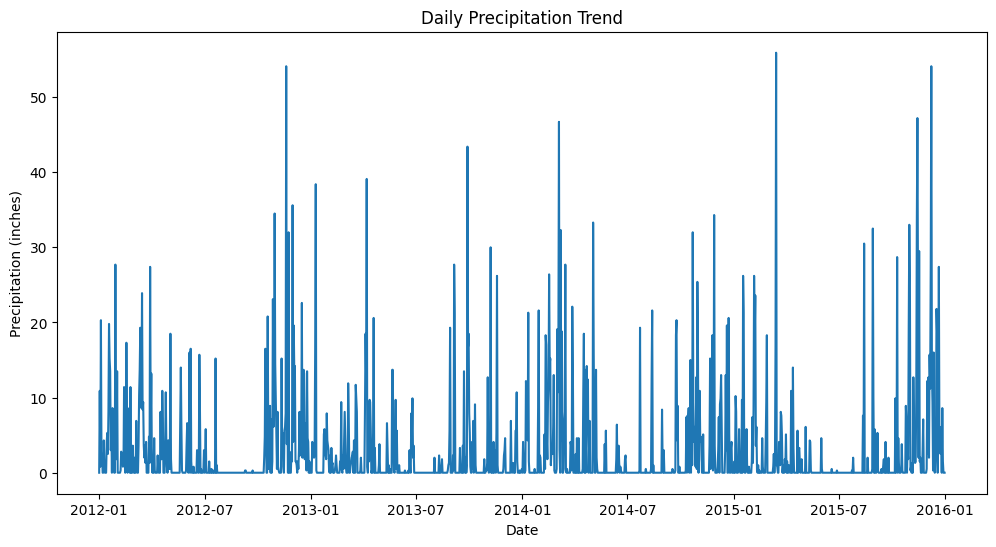

In [141]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['precipitation'])
plt.title('Daily Precipitation Trend')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.show()

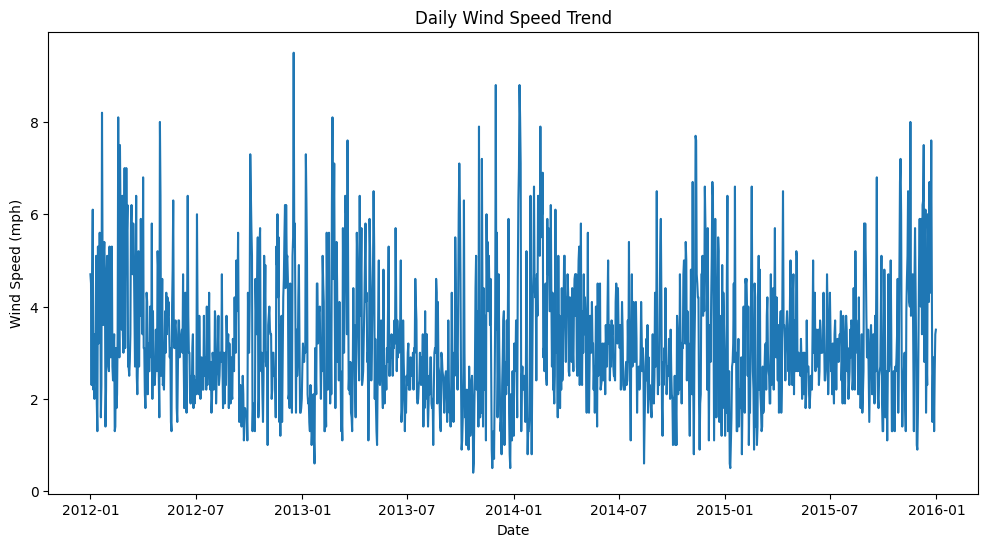

In [142]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['wind'])
plt.title('Daily Wind Speed Trend')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

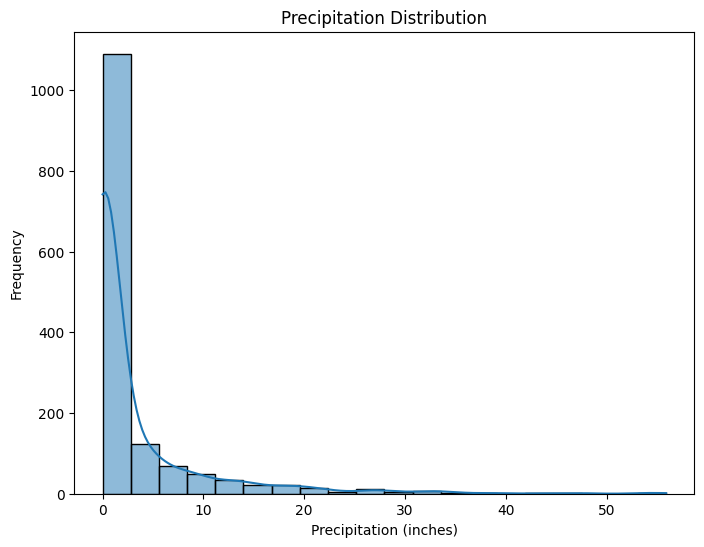

In [143]:
plt.figure(figsize=(8, 6))
sns.histplot(df['precipitation'], bins=20, kde=True)
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

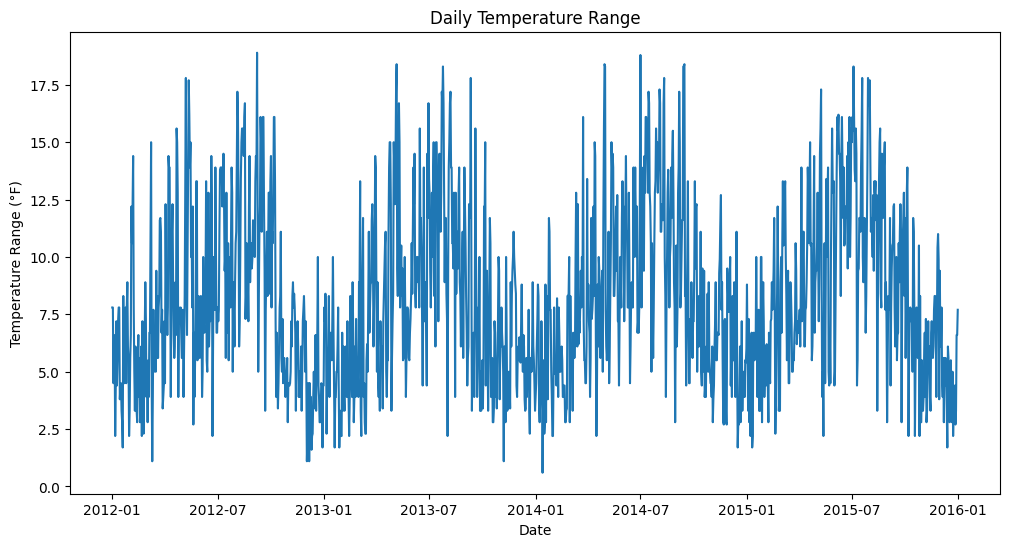

In [144]:
# Comparative Plots
df['temp_range'] = df['temp_max'] - df['temp_min']
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['date'], y=df['temp_range'])
plt.title('Daily Temperature Range')
plt.xlabel('Date')
plt.ylabel('Temperature Range (°F)')
plt.show()

In [145]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,temp_range
0,2012-01-01,0.00,12.80,5.00,4.70,0,2012,1,1,7.80
1,2012-01-02,10.90,10.60,2.80,4.50,2,2012,1,2,7.80
2,2012-01-03,0.80,11.70,7.20,2.30,2,2012,1,3,4.50
3,2012-01-04,20.30,12.20,5.60,4.70,2,2012,1,4,6.60
4,2012-01-05,1.30,8.90,2.80,6.10,2,2012,1,5,6.10


In [146]:
X=df.drop(['weather','temp_range','date'],axis=1)
y=df['weather']

In [147]:
# Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Choosing ML algorithm
lazy= LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = lazy.fit(X_train, X_test, y_train, y_test)

print(models)

 97%|█████████▋| 28/29 [00:04<00:00,  3.95it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 295
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 7
[LightGBM] [Info] Start training from score -3.278859
[LightGBM] [Info] Start training from score -2.732315
[LightGBM] [Info] Start training from score -0.807298
[LightGBM] [Info] Start training from score -4.172676
[LightGBM] [Info] Start training from score -0.830600
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

100%|██████████| 29/29 [00:04<00:00,  6.19it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.48               0.64    None      0.53   
GaussianNB                         0.84               0.60    None      0.81   
BaggingClassifier                  0.84               0.56    None      0.83   
LGBMClassifier                     0.83               0.55    None      0.82   
XGBClassifier                      0.83               0.53    None      0.82   
DecisionTreeClassifier             0.76               0.53    None      0.76   
RandomForestClassifier             0.85               0.52    None      0.83   
ExtraTreeClassifier                0.78               0.51    None      0.77   
LabelSpreading                     0.70               0.51    None      0.69   
ExtraTreesClassifier               0.84               0.51    None      0.81   
LabelPropagation                   0.69 

In [149]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [150]:
# Training the model
clf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
# Prediction
y_pred=clf.predict(X_test)

In [152]:
# Evaluation of model
accuracy_score(y_pred,y_test)

0.863481228668942

In [153]:
X_test,y_test

(      precipitation  temp_max  temp_min  wind  year  month  day
 892            0.00     23.90     11.10  2.70  2014      6   11
 1105           5.80      7.80      6.10  0.50  2015      1   10
 413            0.00      9.40      4.40  3.40  2013      2   17
 522            0.00     26.70     12.20  2.50  2013      6    6
 1036           1.80     13.30      7.20  2.90  2014     11    2
 ...             ...       ...       ...   ...   ...    ...  ...
 1361           0.00     20.60      8.30  1.80  2015      9   23
 802            0.50     13.90      5.00  2.50  2014      3   13
 651            0.00     15.00      6.70  1.80  2013     10   13
 722            1.50     11.70      6.10  5.90  2013     12   23
 254            0.00     20.00      8.90  4.20  2012      9   11
 
 [293 rows x 7 columns],
 892     4
 1105    2
 413     2
 522     4
 1036    2
        ..
 1361    4
 802     2
 651     1
 722     2
 254     4
 Name: weather, Length: 293, dtype: int64)

In [154]:
# Custom inputs
input = np.array([[0.00,20.00,8.90,4.2,2012,9,11]]).reshape(1,-1)
result=clf.predict(input)[0]
if result == 0:
    print("raining")
elif result == 1:
    print('sunny')
elif result == 2:
    print('foggy')
elif result == 3:
    print('drizzle')
elif result == 4:
    print('snowing')

snowing
